In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
data=pd.read_csv("employee_burnout_analysis-AI 2.csv")

In [14]:
data


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,30-12-2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,19-01-2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,05-11-2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,10-01-2008,Female,Service,No,2,5.0,5.9,0.52


In [17]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52


In [18]:
data.tail()


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,30-12-2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,19-01-2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,05-11-2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,10-01-2008,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,06-01-2008,Male,Product,No,3,6.0,7.8,0.61


In [19]:
data.head(20)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,26-11-2008,Male,Product,Yes,2,4.0,3.6,0.29
6,fffe33003300340039003100,02-01-2008,Female,Service,No,3,6.0,7.9,0.62
7,fffe32003600320037003400,31-10-2008,Female,Service,Yes,2,4.0,4.4,0.33
8,fffe32003200300034003700,27-12-2008,Female,Service,No,3,6.0,NaN,0.56
9,fffe31003600320030003200,09-03-2008,Female,Product,No,3,6.0,NaN,0.67


In [20]:
data["Company Type"].unique()

array(['Service', 'Product'], dtype=object)

In [21]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [22]:
data.isnull().values.sum()

np.int64(4622)

In [23]:
data.shape

(22750, 9)

In [24]:
data.describe()


,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [25]:
data.columns.tolist()


['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [26]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [28]:
data.isnull()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
22745,False,False,False,False,False,False,False,True,False
22746,False,False,False,False,False,False,False,False,False
22747,False,False,False,False,False,False,False,True,False
22748,False,False,False,False,False,False,False,False,False


In [29]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

In [30]:
data = data.dropna()

In [31]:
data.shape

(18590, 9)

In [32]:
data.dtypes


Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [33]:
data = data.drop('Employee ID', axis = 1)

Min date 01-01-2008
Max date 31-12-2008


<Axes: xlabel='Month', ylabel='Hired employees'>

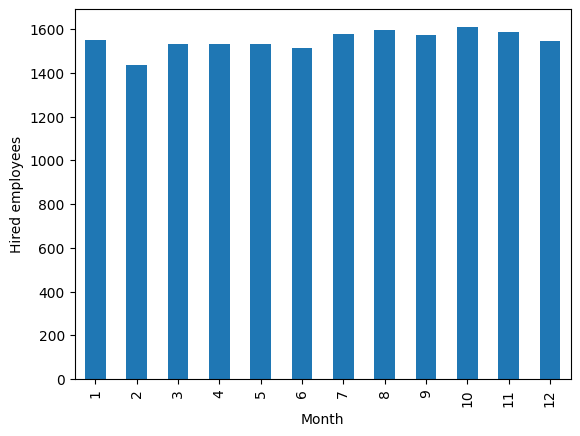

In [34]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")
     

In [35]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
3         70
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748    274
22749    152
Name: Days, Length: 18590, dtype: int64

In [36]:
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.005502
Name: Burn Rate, dtype: float64


In [37]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.005502
Name: Burn Rate, dtype: float64

In [38]:
data = data.drop(['Date of Joining', 'Days'], axis = 1)

In [39]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


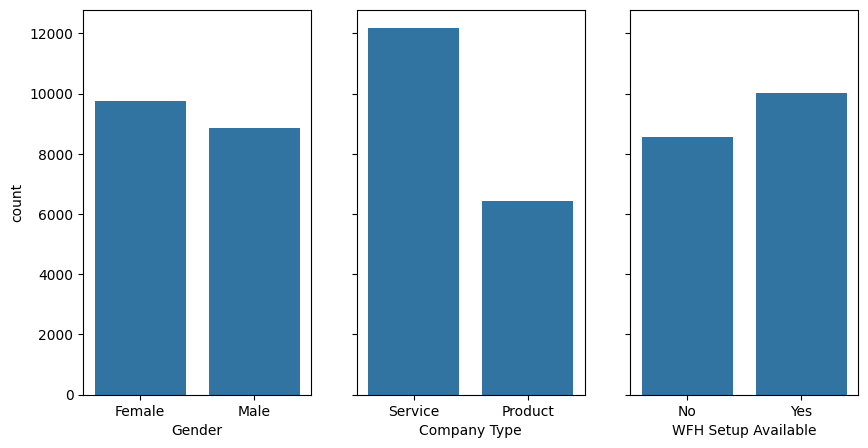

In [40]:
cat_columns = data.select_dtypes(object).columns

fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))

for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])

plt.show()

In [41]:
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available', 'Gender'], drop_first=True)
    data.head()
    encoded_columns = data.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    print(data.columns)

In [42]:
data

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
5,2,4.0,3.6,0.29,False,True,True
...,...,...,...,...,...,...,...
22743,1,3.0,6.0,0.48,False,True,False
22744,3,7.0,6.2,0.54,False,False,True
22746,3,6.0,6.7,0.59,False,True,False
22748,2,5.0,5.9,0.52,True,False,False


In [43]:
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=True, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
# Use the correct index for X_train
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


In [45]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
3249,0.729794,0.733212,0.501849,0.714251,-1.104601,1.049455
7925,0.729794,0.733212,0.398570,-1.400068,0.905304,1.049455
16635,-0.155002,-0.730675,-1.925209,0.714251,-1.104601,1.049455
3456,1.614590,0.733212,1.224802,-1.400068,-1.104601,-0.952875
17562,0.729794,0.245250,-0.169465,0.714251,-1.104601,1.049455
...,...,...,...,...,...,...
13453,0.729794,1.221175,1.637919,-1.400068,0.905304,-0.952875
21179,0.729794,0.245250,-1.047337,0.714251,0.905304,1.049455
6327,0.729794,0.245250,0.088733,0.714251,-1.104601,1.049455
14933,-0.155002,0.245250,0.708407,0.714251,-1.104601,1.049455


In [46]:
y_train

3249     0.62
7925     0.50
16635    0.13
3456     0.66
17562    0.42
         ... 
13453    0.78
21179    0.30
6327     0.42
14933    0.54
288      0.57
Name: Burn Rate, Length: 5577, dtype: float64

In [49]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [48]:
print("Linear Regression Model Performance Matrics \n")
y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate RMSE by taking the square root of MSE
rmse = mse**0.5
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Linear Regression Model Performance Matrics 

Mean Squared Error: 0.003126518670318383
Root Mean Squared Error: 0.055915281187868336
Mean Absolute Error: 0.045748186923994995
R-squared: 0.9199255887706531


In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()